In [1]:
import pyodbc
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

In [2]:
SERVER_ADDRESS = "localhost"
DATABASE = "testdw"
USER = "SA"
PASSWORD = "super_password"

In [3]:
sql_conn = pyodbc.connect(
    f"DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={SERVER_ADDRESS};DATABASE={DATABASE};UID={USER};PWD={PASSWORD};TrustServerCertificate=yes;"
)
cursor = sql_conn.cursor()

In [33]:
select_cols = """
Game.gameID,
League.name as leagueName,
Team.name as homeTeamName,
Team.teamID as homeTeamID,
Game.awayTeamID,
Game.season,
Game.homeProbability,
Game.drawProbability,
Game.awayProbability,
teamstats.xGoals as homeGoalsProbability,
Game.B365H,
Game.B365D,
Game.B365A,
Game.BWH,
Game.BWD,
Game.BWA,
Game.IWH,
Game.IWD,
Game.IWA,
Game.PSH,
Game.PSD,
Game.PSA,
Game.WHH,
Game.WHD,
Game.WHA,
Game.VCH,
Game.VCD,
Game.VCA,
Game.PSCH,
Game.PSCD,
Game.PSCA,
teamstats.result
""".replace("\n", " ")

query = f"""
SELECT {select_cols}
FROM Team, League, Game, teamstats
WHERE Team.teamID=teamstats.teamID AND Game.gameID=teamstats.gameID AND Game.leagueID=League.leagueID AND Game.homeTeamID=teamstats.teamID
""".replace("\n", " ")

cursor.execute(query)
data = cursor.fetchall()
print("Length on selected data: ", len(data))

data_labels = [item[0] for item in data[0].cursor_description]
print("Data labels: ", data_labels)

Length on selected data:  12680
Data labels:  ['gameID', 'leagueName', 'homeTeamName', 'homeTeamID', 'awayTeamID', 'season', 'homeProbability', 'drawProbability', 'awayProbability', 'homeGoalsProbability', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA', 'result']


In [34]:
df = pd.DataFrame(data=np.array(data), columns=data_labels)

df = df.dropna()
df = df.convert_dtypes()

df

,gameID,leagueName,homeTeamName,homeTeamID,awayTeamID,season,homeProbability,drawProbability,awayProbability,homeGoalsProbability,...,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA,result
0,81,Premier League,Manchester United,89,82,2015,0.2843,0.3999,0.3158,0.627539,...,1.62,3.6,6.0,1.67,4.0,5.75,1.64,4.07,6.04,W
1,82,Premier League,Bournemouth,73,71,2015,0.3574,0.35,0.2926,0.876106,...,1.91,3.5,4.0,2.0,3.5,4.2,1.82,3.88,4.7,L
2,83,Premier League,Everton,72,90,2015,0.2988,0.4337,0.2675,0.604226,...,1.73,3.5,5.0,1.73,3.9,5.4,1.75,3.76,5.44,D
3,84,Premier League,Leicester,75,77,2015,0.6422,0.2057,0.1521,2.56803,...,2.0,3.1,2.7,2.0,3.4,4.33,1.79,3.74,5.1,W
4,85,Premier League,Norwich,79,78,2015,0.1461,0.2159,0.638,1.13076,...,2.6,3.1,2.88,2.6,3.25,3.0,2.46,3.39,3.14,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12675,16131,Ligue 1,Nantes,168,166,2020,0.2812,0.2671,0.4517,1.41119,...,1.5,4.5,6.0,1.5,4.33,6.0,1.58,4.36,6.18,L
12676,16132,Ligue 1,Reims,177,176,2020,0.3367,0.2999,0.3634,1.19819,...,2.5,2.9,3.2,2.4,3.1,3.0,2.66,3.28,2.93,L
12677,16133,Ligue 1,Rennes,163,235,2020,0.6719,0.2502,0.0779,1.33269,...,1.32,5.25,9.0,1.3,5.25,9.0,1.23,6.85,12.59,W
12678,16134,Ligue 1,Saint-Etienne,175,181,2020,0.3541,0.301,0.3449,1.4605,...,1.29,5.25,11.0,1.29,5.25,9.5,1.29,5.97,10.8,L


In [35]:
df.dtypes

gameID                    Int64
leagueName               string
homeTeamName             string
homeTeamID                Int64
awayTeamID                Int64
season                    Int64
homeProbability         Float64
drawProbability         Float64
awayProbability         Float64
homeGoalsProbability    Float64
B365H                   Float64
B365D                   Float64
B365A                   Float64
BWH                     Float64
BWD                     Float64
BWA                     Float64
IWH                     Float64
IWD                     Float64
IWA                     Float64
PSH                     Float64
PSD                     Float64
PSA                     Float64
WHH                     Float64
WHD                     Float64
WHA                     Float64
VCH                     Float64
VCD                     Float64
VCA                     Float64
PSCH                    Float64
PSCD                    Float64
PSCA                    Float64
result  

In [36]:
print("* Unique leagues:", df.leagueName.unique(), end="\n\n")
print("* Unique teams:", df.homeTeamName.unique(), end="\n\n")
print("* Unique results:", df.result.unique(), end="\n\n")

* Unique leagues: <StringArray>
['Premier League', 'Serie A', 'Bundesliga', 'La Liga', 'Ligue 1']
Length: 5, dtype: string

* Unique teams: <StringArray>
[   'Manchester United',          'Bournemouth',              'Everton',
            'Leicester',              'Norwich',              'Chelsea',
     'Newcastle United',              'Arsenal',                'Stoke',
 'West Bromwich Albion',
 ...
     'Sheffield United',             'Mallorca',         'Union Berlin',
                'Brest',                'Lecce',              'Brescia',
                'Leeds',               'Spezia',                'Cadiz',
    'Arminia Bielefeld']
Length: 146, dtype: string

* Unique results: <StringArray>
['W', 'L', 'D']
Length: 3, dtype: string



In [37]:
df_for_ml = df.copy(deep=True)
df_for_ml = df_for_ml.drop(columns=["gameID", "leagueName", "homeTeamName", "season"])

result_classes = dict(L=0, W=1, D=2)
df_for_ml.result = df_for_ml.result.map(result_classes)

df_for_ml

,homeTeamID,awayTeamID,homeProbability,drawProbability,awayProbability,homeGoalsProbability,B365H,B365D,B365A,BWH,...,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA,result
0,89,82,0.2843,0.3999,0.3158,0.627539,1.65,4.0,6.0,1.65,...,1.62,3.6,6.0,1.67,4.0,5.75,1.64,4.07,6.04,1
1,73,71,0.3574,0.35,0.2926,0.876106,2.0,3.6,4.0,2.0,...,1.91,3.5,4.0,2.0,3.5,4.2,1.82,3.88,4.7,0
2,72,90,0.2988,0.4337,0.2675,0.604226,1.7,3.9,5.5,1.7,...,1.73,3.5,5.0,1.73,3.9,5.4,1.75,3.76,5.44,2
3,75,77,0.6422,0.2057,0.1521,2.56803,1.95,3.5,4.33,2.0,...,2.0,3.1,2.7,2.0,3.4,4.33,1.79,3.74,5.1,1
4,79,78,0.1461,0.2159,0.638,1.13076,2.55,3.3,3.0,2.6,...,2.6,3.1,2.88,2.6,3.25,3.0,2.46,3.39,3.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12675,168,166,0.2812,0.2671,0.4517,1.41119,1.45,4.5,7.0,1.5,...,1.5,4.5,6.0,1.5,4.33,6.0,1.58,4.36,6.18,0
12676,177,176,0.3367,0.2999,0.3634,1.19819,2.55,2.87,3.25,2.45,...,2.5,2.9,3.2,2.4,3.1,3.0,2.66,3.28,2.93,0
12677,163,235,0.6719,0.2502,0.0779,1.33269,1.3,5.75,9.0,1.34,...,1.32,5.25,9.0,1.3,5.25,9.0,1.23,6.85,12.59,1
12678,175,181,0.3541,0.301,0.3449,1.4605,1.3,5.5,10.0,1.33,...,1.29,5.25,11.0,1.29,5.25,9.5,1.29,5.97,10.8,0


In [40]:
x_train, x_test, y_train, y_test = train_test_split(df_for_ml.drop(columns=["result"]), df_for_ml["result"], test_size=0.1)

In [41]:
model = RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=220, n_jobs=20)
model.fit(x_train, y_train)

print(f'Score : {model.score(x_test, y_test) * 100:.2f}%')
print('Mean Squared Error :', mean_squared_error(y_test, model.predict(x_test)))

Score : 61.30%
Mean Squared Error : 0.7010309278350515


In [42]:
x_test.iloc[:3,]

,homeTeamID,awayTeamID,homeProbability,drawProbability,awayProbability,homeGoalsProbability,B365H,B365D,B365A,BWH,...,PSA,WHH,WHD,WHA,VCH,VCD,VCA,PSCH,PSCD,PSCA
8949,163,166,0.4369,0.4152,0.1479,0.768295,2.05,3.4,3.8,2.1,...,3.98,2.05,3.2,3.9,2.1,3.2,4.0,2.12,3.32,3.95
4752,208,146,0.1544,0.2525,0.5931,1.38838,4.75,4.2,1.67,4.75,...,1.66,5.0,3.6,1.7,5.0,4.5,1.67,5.78,4.54,1.6
8741,117,132,0.9841,0.0142,0.0017,4.62869,1.25,6.5,10.0,1.25,...,11.22,1.25,6.0,12.0,1.25,6.5,11.5,1.31,5.75,10.18


In [43]:
model.predict(x_test.iloc[:3,])

array([1, 0, 1])

In [44]:
y_test.iloc[:3,]

8949    2
4752    0
8741    1
Name: result, dtype: int64

In [45]:
feature_imp = [(x_train.columns[i], imp) for i,imp in enumerate(model.feature_importances_)]
feature_imp = sorted(feature_imp, key=lambda x: x[1])
feature_imp

[('B365D', 0.019561409889907948),
 ('WHH', 0.0203714068792314),
 ('VCD', 0.02091458538355499),
 ('WHD', 0.021208452730895402),
 ('BWD', 0.021507483961589156),
 ('BWH', 0.022994010438111574),
 ('VCH', 0.023052856277596977),
 ('IWH', 0.023790738127621672),
 ('B365H', 0.023825028205368803),
 ('B365A', 0.02396588417355255),
 ('IWD', 0.02414240917209742),
 ('VCA', 0.02531015635659365),
 ('BWA', 0.025864329810473576),
 ('WHA', 0.02604597961262173),
 ('IWA', 0.02789898982452629),
 ('PSH', 0.03258983627788223),
 ('PSD', 0.03473546225782228),
 ('PSA', 0.03656354173603084),
 ('PSCD', 0.03905613197898403),
 ('awayTeamID', 0.03945258771995254),
 ('homeTeamID', 0.04070900258036035),
 ('PSCH', 0.04216105692719623),
 ('PSCA', 0.04413990224544431),
 ('drawProbability', 0.06530220997344802),
 ('homeGoalsProbability', 0.0708457730414655),
 ('homeProbability', 0.10013683349788305),
 ('awayProbability', 0.10385394091978734)]

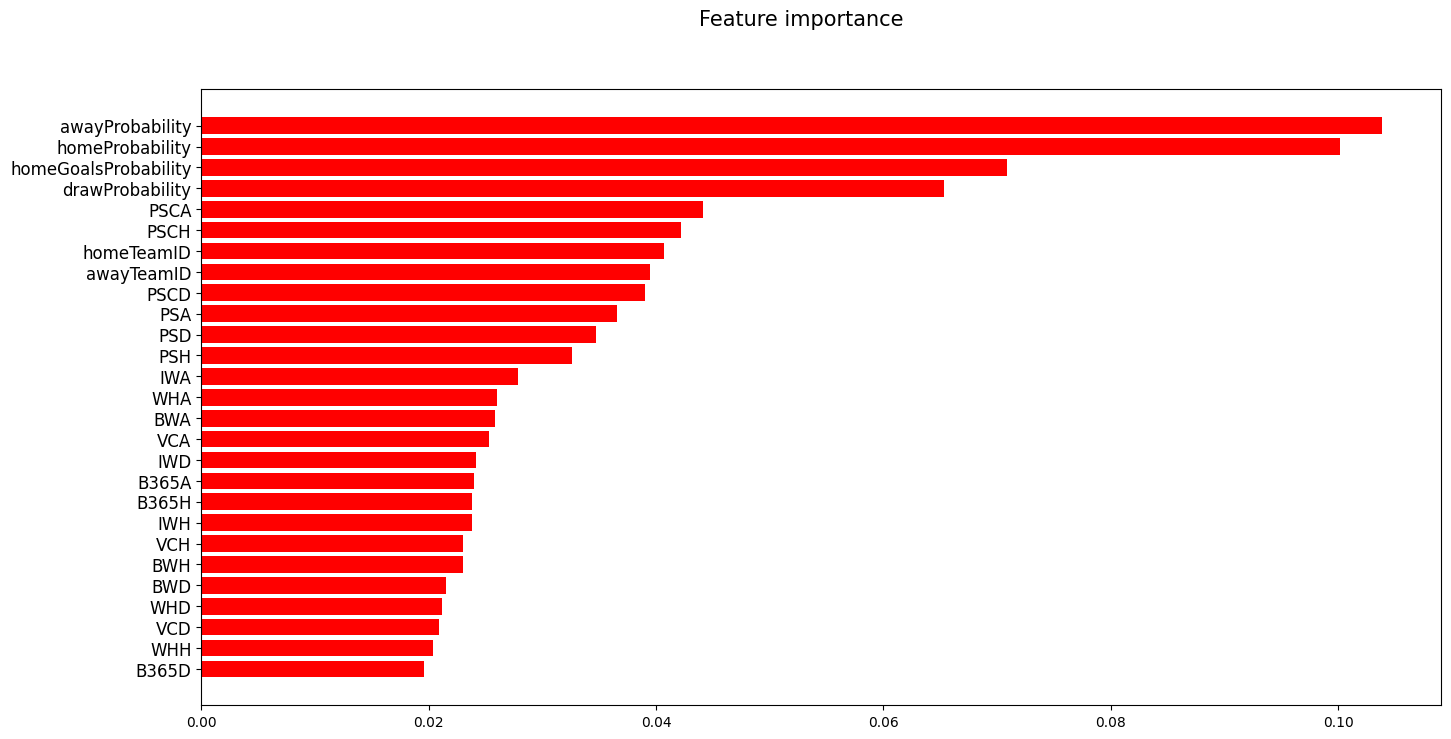

In [46]:
fig, ax = plt.subplots()
ax.barh(range(len(x_train.columns)),[y for x,y in feature_imp], color='r')
ax.set_yticks(range(len(x_train.columns)))
ax.set_yticklabels([x for x, y in feature_imp], fontsize=12)
fig.suptitle('Feature importance', fontsize=15)
fig.set_size_inches(16,8)